# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pickle
import numpy as np

 Best performance:
 C=0.30, Accuracy=0.9400


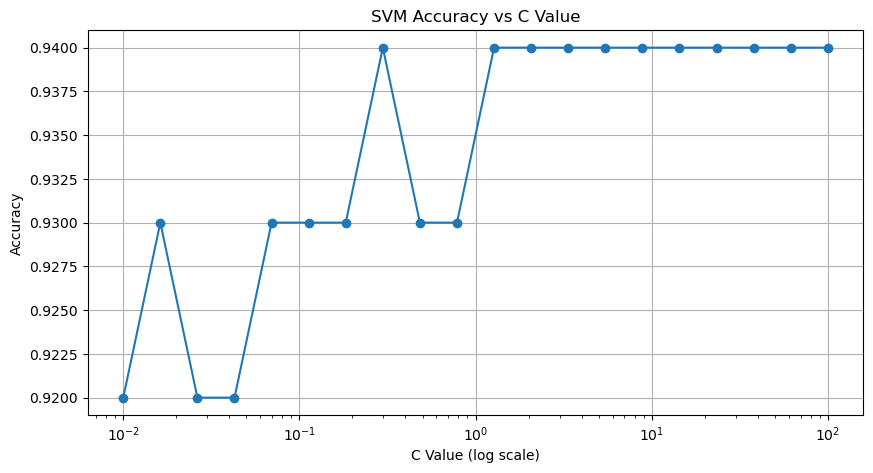

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=.8, random_state=42)

C_values = np.logspace(-2, 2, 20)
acc_linear = []

for C in C_values:
    svc_model = svm.SVC(kernel='linear', C=C)
    svc_model.fit(X, y)
    y_pred = svc_model.predict(X)
    acc = accuracy_score(y, y_pred)
    acc_linear.append(acc)

# Find the best C value 

C_best = C_values[np.argmax(acc_linear)]
print(f" Best performance:\n C={C_best:.2f}, Accuracy={np.max(acc_linear):.4f}")
# Plotting the results
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, acc_linear, marker='o')
plt.title('SVM Accuracy vs C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.grid()


The best value for slack hyperparameter C is the smallest/strictest that guarentees maximum accuracy and it is C=0.30. That is because:
* Small C (e.g., 0.01) → too much regularisation → underfitting.
* Large C (e.g., 10–100) → very strict on margin violations → overfitting.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


 Best performance:
 C=0.78, Accuracy=0.9500


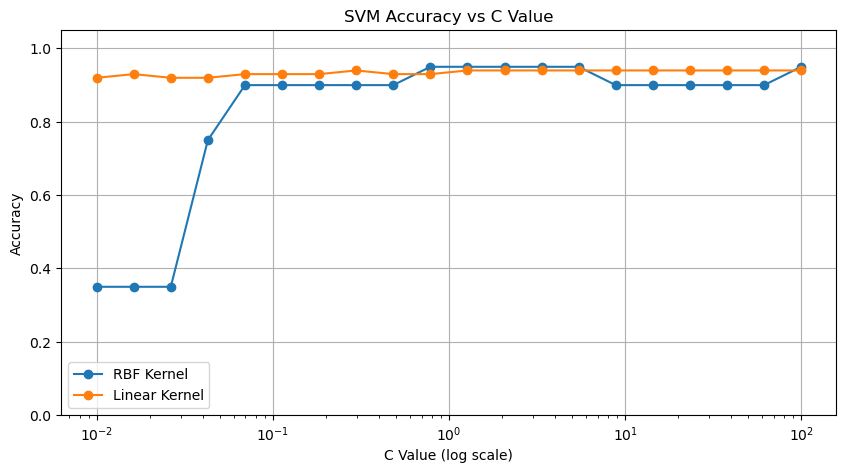

In [22]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = np.logspace(-2, 2, 20)
acc_nonl = []

for C in C_values:
    svc_model = svm.SVC(kernel='rbf', C=C)
    svc_model.fit(X_train, y_train)
    y_pred = svc_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_nonl.append(acc)

# Find the best C value 

C_best = C_values[np.argmax(acc_nonl)]
best_acc = np.max(acc_nonl)
print(f" Best performance:\n C={C_best:.2f}, Accuracy={best_acc:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, acc_nonl, marker='o', label='RBF Kernel')
plt.semilogx(C_values, acc_linear, marker='o', label='Linear Kernel')
plt.legend()
plt.ylim(0, 1.05)
plt.title('SVM Accuracy vs C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.grid()


 Best performance:
 C=61.58, Accuracy=0.9500
 Best performance:
 C=2.07, Accuracy=0.9000


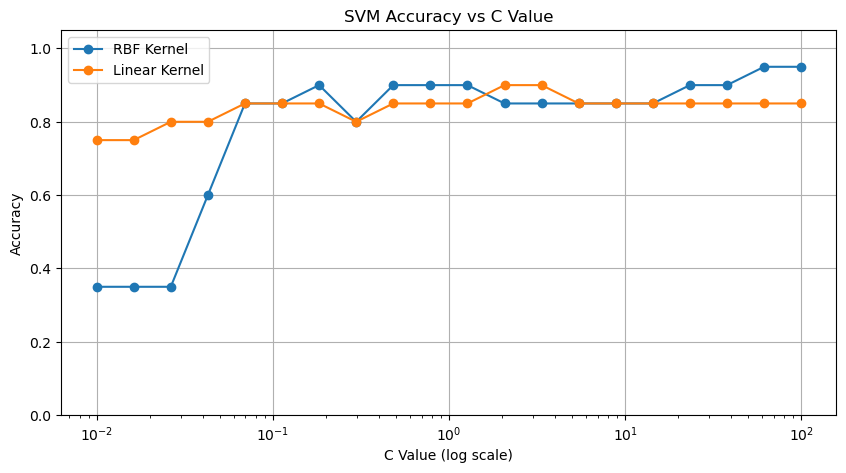

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=1.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = np.logspace(-2, 2, 20)
acc_nonl = []

acc_nonl = []
acc_linear = []

for C in C_values:
    # Nonlinear (RBF) kernel
    svc_model_rbf = svm.SVC(kernel='rbf', C=C)
    svc_model_rbf.fit(X_train, y_train)
    y_pred_rbf = svc_model_rbf.predict(X_test)
    acc_nonl.append(accuracy_score(y_test, y_pred_rbf))
    
    # Linear kernel
    svc_model_lin = svm.SVC(kernel='linear', C=C)
    svc_model_lin.fit(X_train, y_train)
    y_pred_lin = svc_model_lin.predict(X_test)
    acc_linear.append(accuracy_score(y_test, y_pred_lin))

# Find the best C value for nonlinear kernel
C_best = C_values[np.argmax(acc_nonl)]
best_acc = np.max(acc_nonl)
print(f" Best performance:\n C={C_best:.2f}, Accuracy={best_acc:.4f}")

# Print the best performance for linear kernel
C_best = C_values[np.argmax(acc_linear)]
best_acc = np.max(acc_linear)
print(f" Best performance:\n C={C_best:.2f}, Accuracy={best_acc:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, acc_nonl, marker='o', label='RBF Kernel')
plt.semilogx(C_values, acc_linear, marker='o', label='Linear Kernel')
plt.legend()
plt.ylim(0, 1.05)
plt.title('SVM Accuracy vs C Value')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.grid()


The nonlinear kernel requires more slack to perform well (i.e. higher
C), since it needs more data flexibility to fit the curved boundary - but once it gets that, it catches up or surpasses the linear SVM. On the other hard, the linear kernel is consistently above 90% performance, even for small slack values, but also faces a ceiling that can be matched or surpassed by the nonlinear one after an increase in C.

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [60]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [63]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [73]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
